In [36]:
# Solution and Full Code in Python to problem set One.

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import importlib  # Import the importlib module
from scipy.fftpack import fft, ifft

# Get the path of the directory that contains the utils folder
module_path = os.path.abspath(os.path.join('..'))  # Adjust according to your file structure
if module_path not in sys.path:
    sys.path.append(module_path)

# Now import your function
from utils.plot_simEEG import plot_simEEG

# Reload the module after making changes
import utils.plot_simEEG  # Import the module
importlib.reload(utils.plot_simEEG)  # Reload the module

# Now you can use the updated function
plot_simEEG = utils.plot_simEEG.plot_simEEG

In [3]:
# EEGLAB Data Structure

class EEG_DATA:
    def __init__(self, srate, pnts, trials, nbchan, data):
        self.srate = srate
        self.pnts = pnts
        self.trials = trials
        self.nbchan = nbchan
        self.times = np.arange(0, pnts) / srate
        self.data = data

### Simulating White Noise

In [4]:
# Simulating White Noise
srate = 500
pnts = 1500
trials = 100
nbchan = 13
data = np.random.randn(nbchan, pnts, trials)

EEG = EEG_DATA(srate=srate, pnts=pnts, trials=trials, nbchan=nbchan, data=data)

Shape of tf: (40, 1500)
Length of EEG.times: 1500
Length of frex: 40


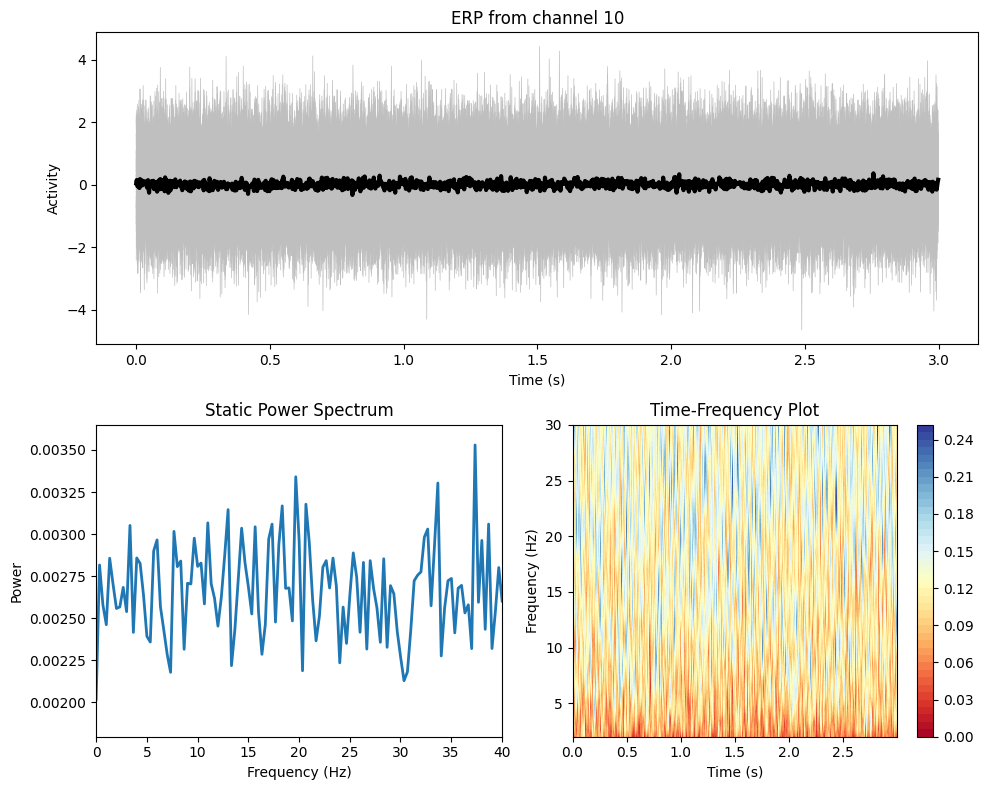

In [5]:
plot_simEEG(EEG, 10, 3)

<!-- Questions -->

1. Effect of noise amplitude on graphs ?

In terms of the ERP, since the data is taken from normal distribution, the mean wont change, the noise amplitude as I can understand will only scale the data.

2. Do the results change if you use normally distributed vs. uniformly distributed noise?

Yes, the graphs do change when we take uniform distribution, instead of normal distribution. For the ERP, the mean is no longer zero and the deviations are also spaced.

the power spectrum is doing something interesting. I think with the power spectrum, for the normal distribution, a lot of different frequencies have some amount of power, (although numerically, it looks very less). But with the uniform distribution, it is clear -- a small number or range has all the power and everything else is zero.

3. Are the results different for different channels? Why or why not?

No, since the simulated data is from the same distribution, there is no difference in the channels.



### Simulating Pink Noise

In [6]:
nbchan = 4

exponential_decay =  10

data = np.zeros([nbchan, pnts, trials])

for i in range(nbchan):
    for trial in range(trials):
        amplitude_spectrum = np.random.rand(1, pnts) * np.exp(-(np.arange(pnts)) / exponential_decay)
        fc = amplitude_spectrum * np.exp(1j * 2 * np.pi * np.random.rand(*amplitude_spectrum.shape))
        data[i, :, trial] = np.real(np.fft.ifft(fc))

EEG = EEG_DATA(srate=srate, pnts=pnts, nbchan=nbchan, trials=trials, data=data)

Shape of tf: (40, 1500)
Length of EEG.times: 1500
Length of frex: 40


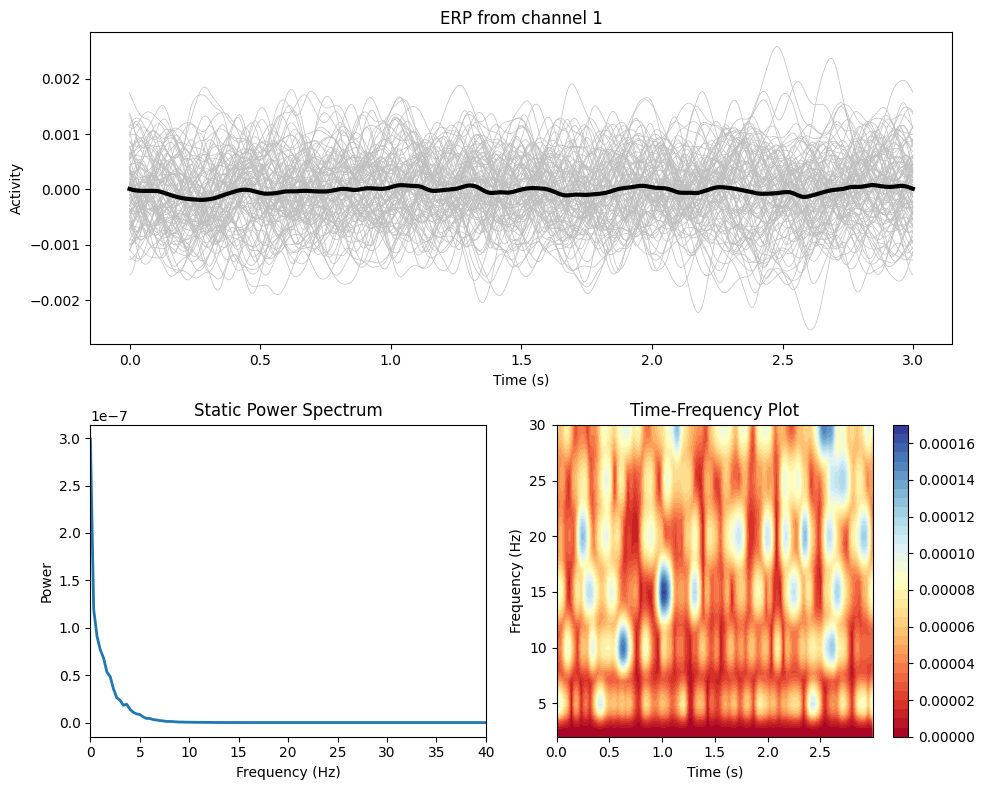

In [7]:
plot_simEEG(EEG, 1, 1)

<!-- Questions -->

1. Which looks more like real EEG data: white or pink noise? Why do you think this is?

I think, the pink noise data looks more like real data. Honestly, the only reason I know ths is because this was told to me, but from practice, like seeing the data which I have recorded, I can see that the power of higher frequency quickly drops, as opposed to white noise.

2. Which values of variable 'ed' make the data look most like real EEG data?

Smaller Values, since the brain osscilation is typically less than 10uv.

### Simulating On-going Stationary Signals

In [8]:
# The goal is to create a dataset with ongoing sinewaves.
# multiple sine-waves simulataneously in each trial / channel.

freq = [3, 5, 16]  # Hz
amplitude = [3, 4, 100] # arbitrary values

for i in range(nbchan):
    phase = 10*np.random.rand(1)
    for j in range(trials):
        sinewave = np.zeros([1, pnts])
        # adding all the frequencies and their amps usinf sin(x) = Asin(2*pi*f*t)
        for i in range(len(freq)):
            sinewave = sinewave + amplitude[i]*np.sin(2*np.pi*freq[i]*(np.arange(0, pnts) / srate) + phase)
            data[i, :, j] = sinewave + np.random.randn(np.size(sinewave))

        

Shape of tf: (40, 1500)
Length of EEG.times: 1500
Length of frex: 40


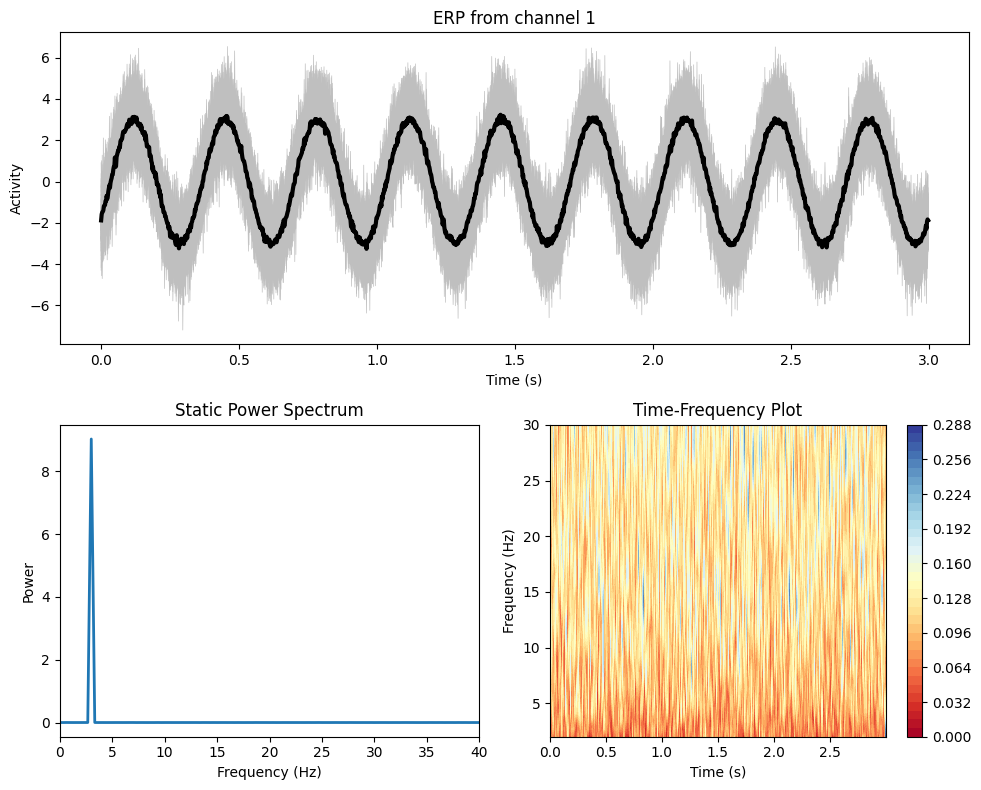

In [9]:
plot_simEEG(EEG, 1, 1)

<!-- Questions -->

1. What can you change in the code above to make the EEG activity non-phase-locked over trials?

As far as I understand, we still have not added the phase component to the data here, if I just add a random number there, maybe the data will be non-phase locked over trials. Let me try it. The way I add it, nothing changes, but this is my best guess.

2. Are all frequencies equally well represented in the 'static' and 'dynamic' power spectra? Can you change the parameters to make the spectral peaks more or less visible in the two plots?

I dont understand one thing here, the sine wave that we are generating has three main sine waves with a good amount of amplitide for each of it. then why is it not showing up atleast in the static power spectrum ? I am not sure how to interpret the dynamic power spectrum...  Changing the parameters ? what is the range of the power ? I tried changing the amplitude, but it is not really making any difference.


### Ongoing Non-Stationary

In [10]:
# narrowband non-stationary data

peak_freq = 14
new_freq = 8
fwhm = 1 # full width at half-maximum. look at the gaussian formula.

hz = np.linspace(0,srate, pnts)

# frequency domain gaussian
s = fwhm * (2*np.pi - 1) / (4*np.pi)
x1 = hz - peak_freq
x2 = hz - new_freq
fg = np.exp(-0.5*(x1 / s) ** 2)
fg1 = np.exp(-0.5*(x2 / s) ** 2)



for i in range(nbchan):
    for j in range(trials):
        fc = np.random.rand(1, pnts) * np.exp(1j*2*np.pi*np.random.rand(1, pnts))
        fc = fc* fg * fg1
        data[i,:,j] = np.real(ifft(fc))

Shape of tf: (40, 1500)
Length of EEG.times: 1500
Length of frex: 40


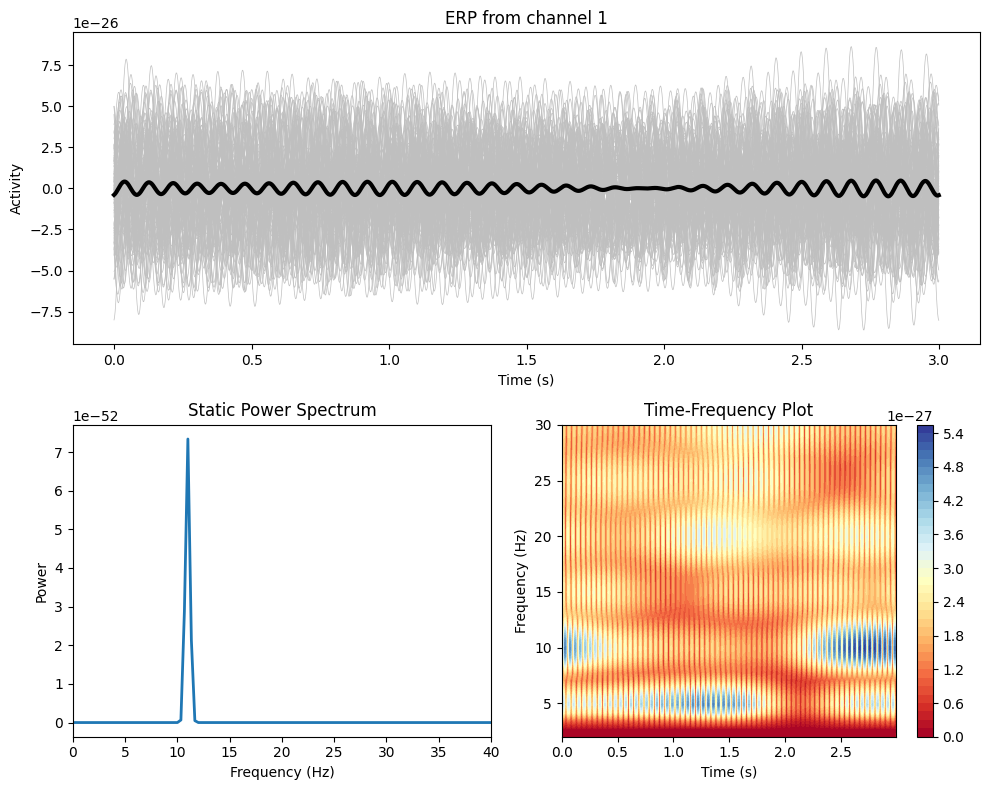

In [11]:
plot_simEEG(EEG, 1, 1)

<!-- Questions -->

1. What is the effect of FWHM on the results? Is larger or smaller more realistic?

I really dont remeber what full-width at half maximum does. Realistic is a question, since at low value, it does look like EOD and jamming, but at high value, it looks more like ERP.

2. Can you modify the code to have narrowband activity at two different frequency ranges?

What if we just calculate the fg for another peak frequency, and then just multiply it together ? I did that, I do see the difference in the time frequency plot. dont know if it is valid or not though.

### Simulating Transients : #1 - Gaussian

In [12]:
pleaktime = 1
width = 0.1

data = np.zeros([nbchan, pnts, trials])

for i in range(nbchan):
    for j in range(trials):
        trialpeak = pleaktime*0.25 + np.random.randn() * 0.25
        gaus = np.exp(-(np.arange(0, pnts) / srate)** 2 / (2*width ** 2))
        data[i,:,j] = gaus

        

Shape of tf: (40, 1500)
Length of EEG.times: 1500
Length of frex: 40


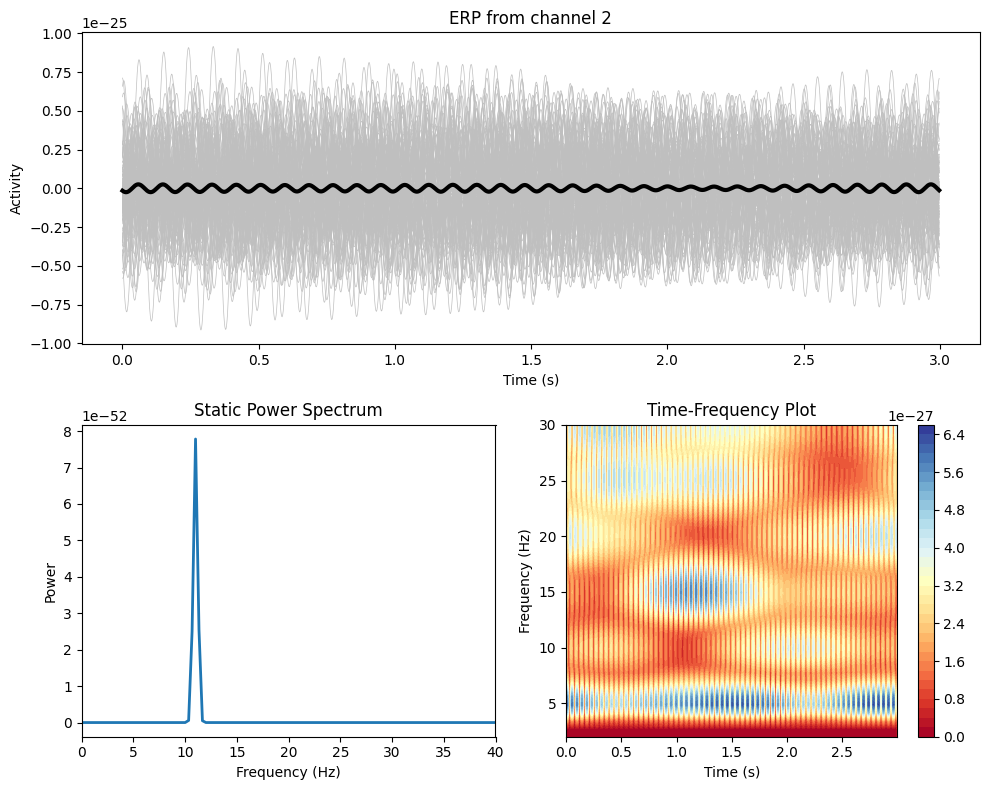

In [13]:
plot_simEEG(EEG, 2, 1)

<!-- Questions -->

1. What happens if you add random jitter to the peaktime on each trial? How much jitter until the ERP is nearly gone?

Not sure how to add jitter, tried adding random value, but that does not make a difference. I also dont really understand the wave.

### Simulating Transients #2 : Oscillations w/ Gaussian

In [24]:
v1 = np.arange(0, pnts) / srate
v1.shape

v1.shape[0] - trialpeak[0]

np.float64(1498.9368906573172)

In [25]:
sfreq = 8;
peaktime = 1;
width = .2;

data = np.zeros([nbchan, pnts, trials])

for i in range(nbchan):
    for j in range(trials):
        trialpeak = peaktime + np.random.randn(5)
        times = np.arange(0, pnts) / srate
        gauss = np.exp(-(times[0] - trialpeak[0])**2 / (2*width ** 2))
        # gauss = np.exp( - (((np.arange(0, pnts) / srate)) - trialpeak)**2 / (2*width**2))
        sw = np.cos(2*np.pi*sfreq*(np.arange(0, pnts) / srate))
        data[i,:,j] = sw * gaus


Shape of tf: (40, 1500)
Length of EEG.times: 1500
Length of frex: 40


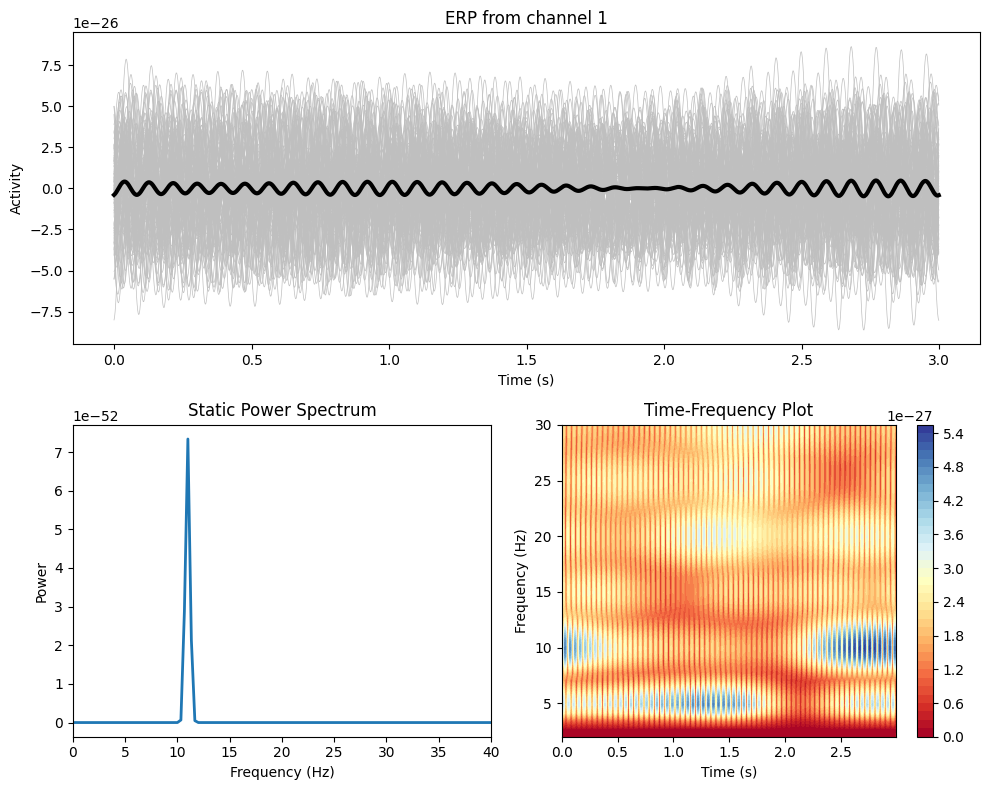

In [26]:
plot_simEEG(EEG, 1, 1)

<!-- Questions -->

I dont really understand this part.